--- Fetching historical data for backtesting ---


[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed



--- Generating backtesting plot ---


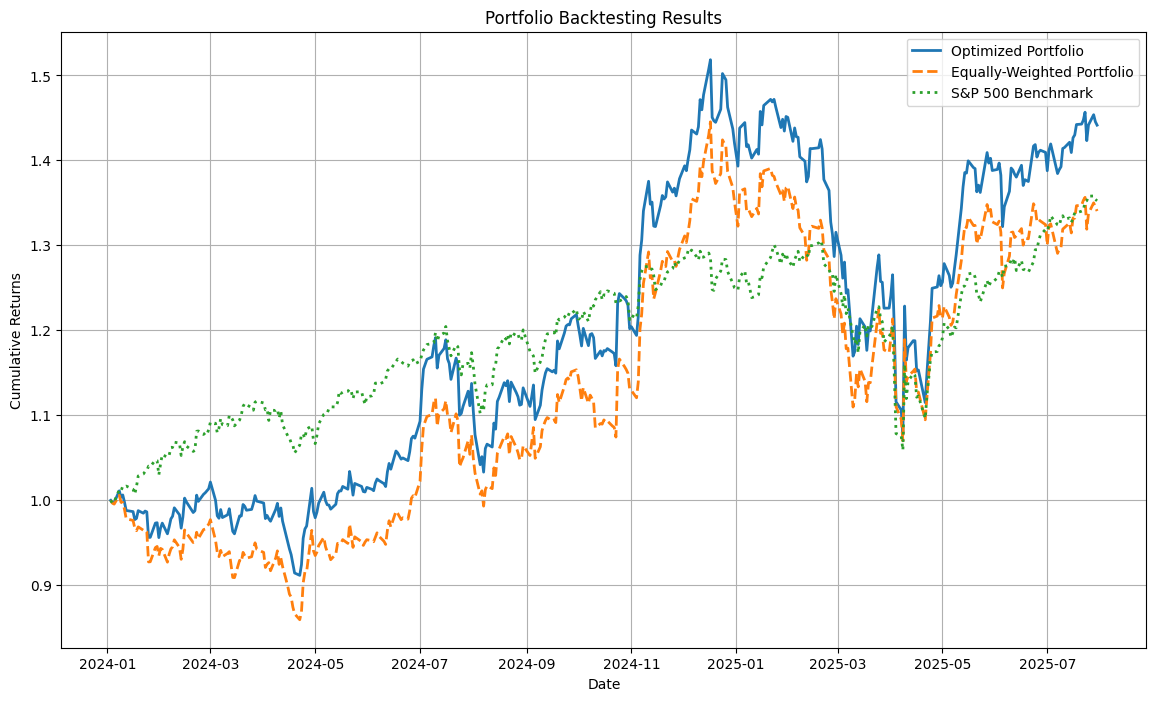


--- Final Cumulative Returns ---
Optimized Portfolio: 1.44
Equally-Weighted Portfolio: 1.34
S&P 500 Benchmark: 1.35


In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

tickers = ["TSLA", "BND", "SPY"]
start_date = "2015-07-01"
end_date = "2025-07-31"

max_sharpe_portfolio_weights = np.array([0.005041, 0.712156, 0.282803])
equal_weights = np.array([1/3, 1/3, 1/3])

print("--- Fetching historical data for backtesting ---")
portfolio_data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)['Close']
portfolio_data.ffill(inplace=True)
portfolio_data.dropna(inplace=True)

backtest_start_date = '2024-01-01'
backtest_data = portfolio_data.loc[backtest_start_date:]

backtest_returns = backtest_data.pct_change().dropna()

optimized_portfolio_returns = (backtest_returns * max_sharpe_portfolio_weights).sum(axis=1)
optimized_portfolio_cumulative_returns = (1 + optimized_portfolio_returns).cumprod()

equal_portfolio_returns = (backtest_returns * equal_weights).sum(axis=1)
equal_portfolio_cumulative_returns = (1 + equal_portfolio_returns).cumprod()

sp500_benchmark = yf.download('^GSPC', start=backtest_start_date, end=end_date, auto_adjust=True)['Close']
sp500_returns = sp500_benchmark.pct_change().dropna()
sp500_cumulative_returns = (1 + sp500_returns).cumprod()

optimized_portfolio_cumulative_returns = optimized_portfolio_cumulative_returns / optimized_portfolio_cumulative_returns.iloc[0]
equal_portfolio_cumulative_returns = equal_portfolio_cumulative_returns / equal_portfolio_cumulative_returns.iloc[0]
sp500_cumulative_returns = sp500_cumulative_returns / sp500_cumulative_returns.iloc[0]

print("\n--- Generating backtesting plot ---")
plt.figure(figsize=(14, 8))
plt.plot(optimized_portfolio_cumulative_returns, label='Optimized Portfolio', linewidth=2)
plt.plot(equal_portfolio_cumulative_returns, label='Equally-Weighted Portfolio', linestyle='--', linewidth=2)
plt.plot(sp500_cumulative_returns, label='S&P 500 Benchmark', linestyle=':', linewidth=2)
plt.title('Portfolio Backtesting Results')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Final Cumulative Returns ---")
print(f"Optimized Portfolio: {optimized_portfolio_cumulative_returns.iloc[-1]:.2f}")
print(f"Equally-Weighted Portfolio: {equal_portfolio_cumulative_returns.iloc[-1]:.2f}")
print(f"S&P 500 Benchmark: {sp500_cumulative_returns.iloc[-1].item():.2f}")
